<a href="https://colab.research.google.com/github/KirilPal/Laboratory_work_numerical_methods-/blob/main/%D0%9B%D0%A0_13_%D0%9F%D0%B0%D0%BB%D0%B0%D0%BC%D0%B0%D1%80%D1%87%D1%83%D0%BA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Паламарчук Кіріл
Лабораторна робота №13
Варіант 22
Група 2-8

##**Вирішення методом Ейлера**

x = [0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2] 
y = [1.1    1.148  1.2072 1.2779 1.3603 1.4547 1.5614 1.6806 1.8127 1.9578
 2.1162]


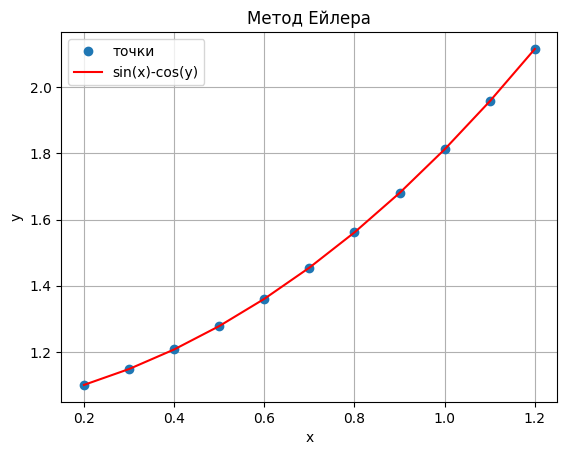

In [16]:
import numpy as np
import matplotlib.pyplot as plt

def f(x, y):
    return x + np.sin(y/np.sqrt(15))

# Вводимо параметри (ліва, права межі відрізку, крок, початкова умова)
a, b, h, y0 = 0.2, 1.2, 0.1, 1.1

# Перевірка вхідних параметрів
if h <= 0:
    print("Крок h повинен бути позитивним.")
    exit()
if a >= b:
    print("Права межа b повинна бути більшою за ліву межу a.")
    exit()

n = int((b - a) / h) # кількість кроків

x = np.array([a + i*h for i in range(n + 1)]) # задаємо x генератором списків

y = np.empty(n + 1)
y[0] = y0

for i in range(n):
    y[i + 1] = y[i] + f(x[i], y[i]) * h

y_rounded = np.round_(y, 4)
print("x =", x, "\ny =", y_rounded)

plt.plot(x, y, "o", x, y, "red")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Метод Ейлера")
plt.legend(["точки", "sin(x)-cos(y)"])
plt.grid()
plt.show()

## **Перевірка odeint**

x= [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2]
y= [1.1        1.13341299 1.17778671 1.23339105 1.30049899 1.37938535
 1.47032534 1.57359264 1.68945698 1.81818141 1.96001876 2.11520761
 2.28396743]


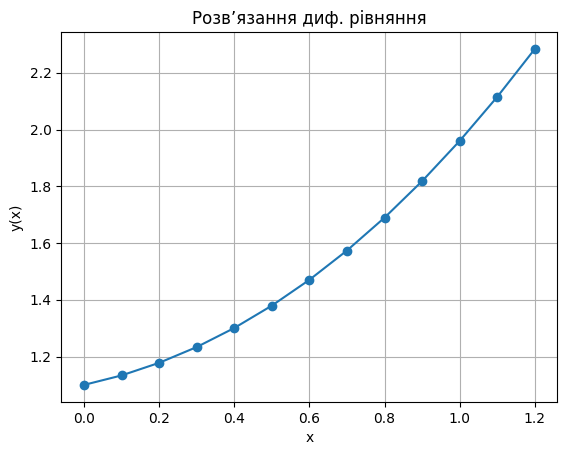

In [17]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Функція, що повертає dy/dx
def model(y, x):
    return x + np.sin(y/np.sqrt(15))

# Початкова умова
y0 = 1.1

# Значення x
x = np.array([i * 0.1 for i in range(0, 13)])

# Розв'язання ODE
y = odeint(model, y0, x)

# Виведення результатів
print('x=', x)
print('y=', y.flatten())  # Перетворення в одновимірний масив для виводу

# Побудова графіка результатів
plt.plot(x, y, marker='o')
plt.xlabel('x')
plt.ylabel('y(x)')
plt.title('Розв’язання диф. рівняння')
plt.grid()
plt.show()

## **Перевірка solve_ivp**

x= [0.2        0.28333333 0.36666667 0.45       0.53333333 0.61666667
 0.7        0.78333333 0.86666667 0.95       1.03333333 1.11666667
 1.2       ]
y= [1.1        1.14392988 1.19578667 1.25572965 1.32392618 1.40054005
 1.48573116 1.57965552 1.68246529 1.79430874 1.91533028 2.04567043
 2.18546585]


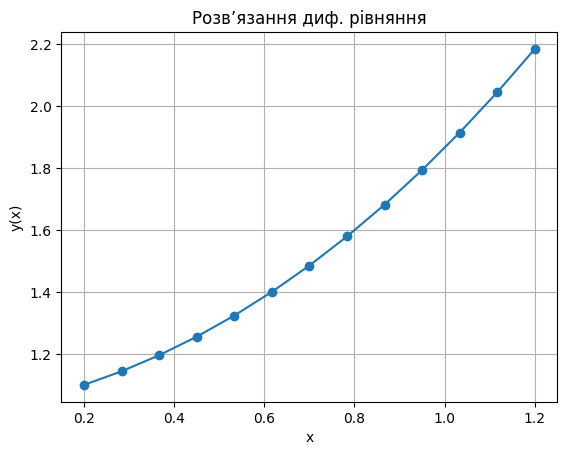

In [32]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Функція, що повертає dy/dx
def model(x, y):
    return x + np.sin(y/np.sqrt(15))

# Початкова умова
y0 = [1.1]  # Потрібно передати як список

# Значення x
x = np.linspace(0.2, 1.2, 13)

# Розв'язання ODE
sol = solve_ivp(model, [0.2, 1.2], y0, t_eval=x)

# Виведення результатів
print('x=', sol.t)
print('y=', sol.y[0])

# Побудова графіка результатів
plt.plot(sol.t, sol.y[0], marker='o')
plt.xlabel('x')
plt.ylabel('y(x)')
plt.title('Розв’язання диф. рівняння')
plt.grid()
plt.show()

## **Розв'язання методом Ейлера-Коші**

x = [0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3] 
y = [0.9    1.0062 1.116  1.2285 1.3433 1.4596 1.5771 1.6954 1.8141 1.9332
 2.0526]


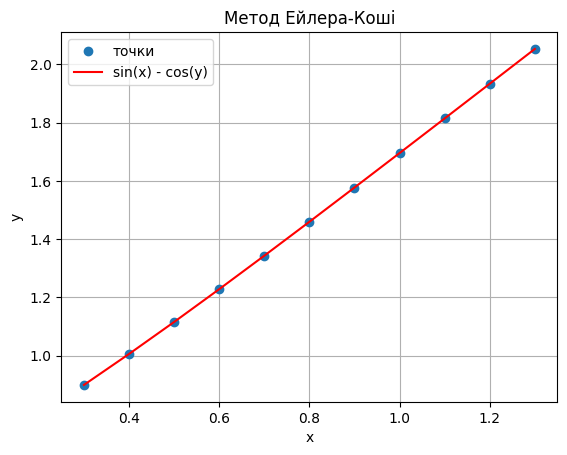

In [18]:
import numpy as np
import matplotlib.pyplot as plt

def f(x, y):
    return x + np.cos(y/np.sqrt(1.5))

a = 0.3  # ліва межа відрізку
b = 1.3  # права межа відрізку
h = 0.1  # крок
y0 = 0.9  # початкова умова
n = int((b - a) / h)  # кількість кроків

# Генерація x, враховуючи останнє значення
x = np.arange(a, b + h, h)  # Задати x з включенням b

y = np.empty(n + 1)
y[0] = y0

# Метод Ейлера-Коші
for i in range(n):
    # Використовується середнє значення для нахилу
    y[i + 1] = y[i] + (f(x[i], y[i]) + f(x[i + 1], y[i] + h * f(x[i], y[i]))) * h / 2

y_rounded = np.round_(y, 4)

print("x =", x, "\ny =", y_rounded)

# Візуалізація
plt.plot(x, y, "o", x, y, "red")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Метод Ейлера-Коші")
plt.legend(["точки", "sin(x) - cos(y)"])
plt.grid()
plt.show()

##**Перевірка odeint**



x= [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2]
y= [0.9        0.9770623  1.05945863 1.14658216 1.23783701 1.33265324
 1.43050093 1.53090248 1.63344258 1.73777555 1.84362969 1.95080965
 2.05919644]


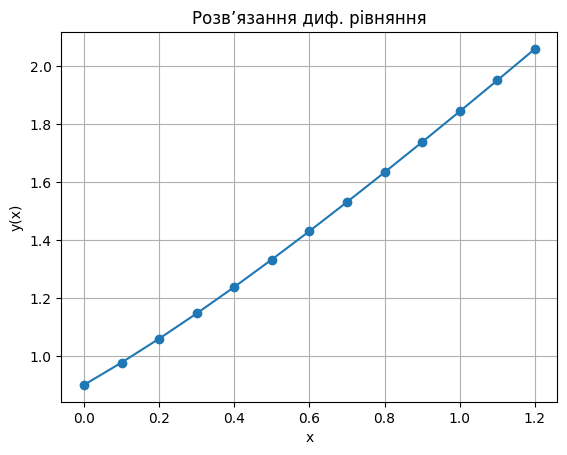

In [19]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Функція, що повертає dy/dx
def model(y, x):
    return x + np.cos(y/np.sqrt(1.5))

# Початкова умова
y0 = 0.9

# Значення x
x = np.array([i * 0.1 for i in range(0, 13)])

# Розв'язання ODE
y = odeint(model, y0, x)

# Виведення результатів
print('x=', x)
print('y=', y.flatten())  # Перетворення в одновимірний масив для виводу

# Побудова графіка результатів
plt.plot(x, y, marker='o')
plt.xlabel('x')
plt.ylabel('y(x)')
plt.title('Розв’язання диф. рівняння')
plt.grid()
plt.show()

## **Перевірка solve_ivp**

x= [0.3        0.38333333 0.46666667 0.55       0.63333333 0.71666667
 0.8        0.88333333 0.96666667 1.05       1.13333333 1.21666667
 1.3       ]
y= [0.9        0.98824542 1.07903901 1.17195529 1.26659119 1.36259017
 1.45964257 1.55748554 1.6559031  1.75472612 1.85383229 1.95314619
 2.05263922]


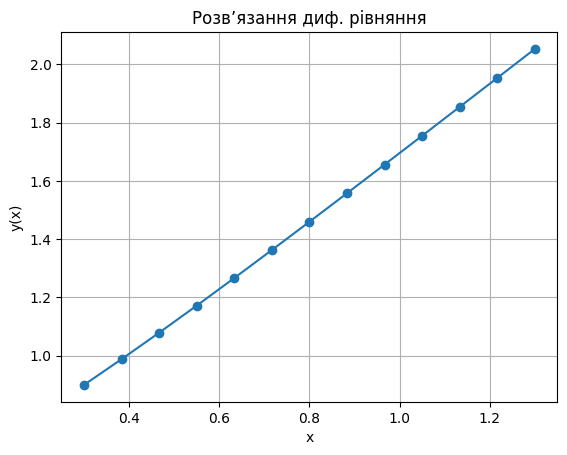

In [28]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Функція, що повертає dy/dx
def model(x, y):
    return x + np.cos(y/np.sqrt(1.5))

# Початкова умова
y0 = [0.9]  # Потрібно передати як список

# Значення x
x = np.linspace(0.3, 1.3, 13)

# Розв'язання ODE
sol = solve_ivp(model, [0.3, 1.3], y0, t_eval=x)

# Виведення результатів
print('x=', sol.t)
print('y=', sol.y[0])

# Побудова графіка результатів
plt.plot(sol.t, sol.y[0], marker='o')
plt.xlabel('x')
plt.ylabel('y(x)')
plt.title('Розв’язання диф. рівняння')
plt.grid()
plt.show()